# Pandas & GeoPandas

Global Historical Climatology Network (GHCN): 2005-2015 New York Region

The data comes from http://www.ncdc.noaa.gov/cdo-web/datasets 

Air Temperature: (tenths of degrees Celsius)
* MNTM - Monthly mean temperature
* MMNT - Monthly Mean minimum temperature
* MMXT - Monthly Mean maximum temperature
* EMNT - Extreme minimum daily temperature
* EMXT - Extreme maximum daily temperature
    
Precipitation: (tenths of mm)
* TPCP - Total precipitation
* EMXP - Extreme maximum daily precipitation 
    
Snow: (mm)
* TSNW - Total snow fall
* MXSD - Maximum snow depth
    


# [Pandas](http://pandas.pydata.org/)

In [3]:
# load pandas
import pandas as pd
#check which version of pandas is being used
pd.__version__

'0.22.0'

In [4]:
# load in csv file of data and put it into the ghcn dataframe object
ghcn = pd.read_csv("data/nyc_2005_2015.csv")

In [6]:
#view the first 5 rows of the data
ghcn.head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244
2,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050801,104,0,148,0,356,178,300,215,257
3,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050901,429,0,548,0,322,100,270,175,223
4,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20051001,1184,0,3803,0,244,33,177,108,142


In [7]:
#get data types and counts of variables
ghcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 11 columns):
STATION_NAME    1625 non-null object
DATE            1625 non-null int64
EMXP            1625 non-null int64
MXSD            1625 non-null int64
TPCP            1625 non-null int64
TSNW            1625 non-null int64
EMXT            1625 non-null int64
EMNT            1625 non-null int64
MMXT            1625 non-null int64
MMNT            1625 non-null int64
MNTM            1625 non-null int64
dtypes: int64(10), object(1)
memory usage: 139.7+ KB


In [5]:
#view column names
ghcn.columns

Index(['STATION_NAME', 'DATE', 'EMXP', 'MXSD', 'TPCP', 'TSNW', 'EMXT', 'EMNT',
       'MMXT', 'MMNT', 'MNTM'],
      dtype='object')

Indexing
====

In [6]:
#ghcn[[list of columns]][numpy style row slice]
ghcn[['MNTM','TSNW']][5:15:2]

,MNTM,TSNW
5,91,0
7,40,53
9,54,13
11,162,0
13,249,0


In [7]:
# use .loc for row, column order
ghcn.loc[5:15:2,'TSNW':'MNTM']

,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
5,0,200,-56,134,48,91
7,53,167,-100,81,-2,40
9,13,217,-56,96,12,54
11,0,289,72,207,117,162
13,0,350,167,289,209,249
15,0,278,94,233,156,194


In [8]:
#use .iloc for numerical indexing on rows and cols
ghcn.iloc[5:15:2, 4:7]

,TPCP,TSNW,EMXT
5,1030,0,200
7,1107,53,167
9,310,13,217
11,1090,0,289
13,1286,0,350


Summary Statistics
==========

In [9]:
#get some summary statistics
ghcn['TSNW'].min(), ghcn['TSNW'].mean(), ghcn['TSNW'].max()

(-9999, -1833.0578461538462, 1023)

In [10]:
import numpy as np
np.__version__

'1.13.3'

In [11]:
# mask missing values by replacing -9999 with np.nan
ghcn.replace(-9999, np.nan, inplace=True)

In [12]:
# Compute the summary statistics of the TSNW column
ghcn['TSNW'].describe()

count    1320.000000
mean       53.769697
std       151.237483
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      1023.000000
Name: TSNW, dtype: float64

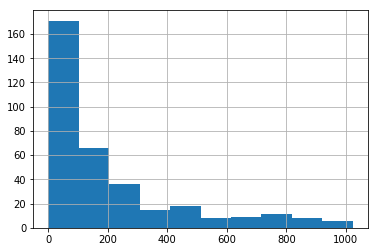

In [13]:
#use matplotlib inline to show images in the notebook
%matplotlib inline 

# plot the histogram of the TSNW column
ghcn['TSNW'].hist(range=[0.5,1023])


In [14]:
#summary for entire dataset
ghcn.describe()

,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
count,1.625000e+03,1622.000000,987.000000,1622.000000,1320.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,2.009903e+07,370.113440,49.962513,977.469174,53.769697,255.468858,16.496540,169.991349,84.250865,127.134948
std,2.654034e+04,270.251403,108.166236,665.199628,151.237483,82.013978,96.101295,90.428972,84.560433,87.190188
min,2.005060e+07,0.000000,0.000000,0.000000,0.000000,44.000000,-182.000000,-7.000000,-83.000000,-44.000000
25%,2.008040e+07,208.000000,0.000000,553.000000,0.000000,189.000000,-71.000000,87.750000,4.750000,47.000000
50%,2.010040e+07,305.000000,0.000000,880.500000,0.000000,269.500000,17.000000,176.000000,82.000000,128.000000
75%,2.012070e+07,460.000000,45.500000,1250.000000,5.000000,323.500000,100.000000,255.000000,165.000000,210.250000
max,2.014120e+07,2443.000000,584.000000,4813.000000,1023.000000,539.000000,200.000000,336.000000,239.000000,282.000000


In [15]:
# compute frequencies of discrete variables 
ghcn['STATION_NAME'].value_counts()

WESTCHESTER CO AIRPORT NY US                        121
NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US    121
NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US     121
NEW YORK LAGUARDIA AIRPORT NY US                    121
CENTERPORT NY US                                    121
FARMINGDALE REPUBLIC AIRPORT NY US                  121
BRONX NY US                                         101
MINEOLA NY US                                        83
WANTAGH CEDAR CREEK NY US                            83
DOBBS FERRY ARDSLEY NY US                            83
FLORAL PARK 0.4 W NY US                              81
STATEN ISLAND 4.5 SSE NY US                          60
OCEANSIDE NY US                                      57
LEVITTOWN 0.2 E NY US                                54
STATEN ISLAND 1.4 SE NY US                           41
MIDDLE VILLAGE 0.5 SW NY US                          39
NEW ROCHELLE 1.3 S NY US                             35
WEST NYACK 1.3 WSW NY US                        

Fixing dates
=======

In [16]:
# print the first 5 entires of the DATE column
ghcn['DATE'].head()

0    20050601
1    20050701
2    20050801
3    20050901
4    20051001
Name: DATE, dtype: int64

In [17]:
# convert the DATE values into datetime objects
# DATE is in '%Y%m%d' format
# store the parsed dates in the new date column
ghcn['date'] = pd.to_datetime(ghcn['DATE'],format='%Y%m%d')

In [18]:
# Print the 'date' column
ghcn['date'].head()

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: date, dtype: datetime64[ns]

Filtering
=====

In [19]:
# use numpy style boolean indexing to grab all rows 
# where TSNW > 400 and MNTM < 0 
ghcn[(ghcn['TSNW']>400) & (ghcn['MNTM']<0)].head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date
350,CENTERPORT NY US,20100201,673.0,279.0,1689.0,676.0,78.0,-100.0,23.0,-36.0,-6.0,2010-02-01
850,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20110101,325.0,305.0,904.0,561.0,94.0,-144.0,16.0,-48.0,-16.0,2011-01-01
886,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20140101,183.0,180.0,765.0,433.0,122.0,-160.0,23.0,-60.0,-18.0,2014-01-01
887,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20140201,323.0,250.0,1167.0,535.0,128.0,-116.0,30.0,-39.0,-4.0,2014-02-01
934,NEW YORK LAGUARDIA AIRPORT NY US,20110101,284.0,457.0,1003.0,828.0,117.0,-128.0,26.0,-27.0,-1.0,2011-01-01


In [20]:
# use exact string matching to find all rows for Centerport
# .head is just to show the top 5
ghcn[ghcn['STATION_NAME'].str.match('CENTERPORT NY US')].head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date
294,CENTERPORT NY US,20050601,122.0,0.0,463.0,0.0,328.0,111.0,267.0,171.0,219.0,2005-06-01
295,CENTERPORT NY US,20050701,472.0,0.0,1300.0,0.0,339.0,150.0,279.0,194.0,236.0,2005-07-01
296,CENTERPORT NY US,20050801,173.0,0.0,337.0,0.0,350.0,161.0,288.0,205.0,246.0,2005-08-01
297,CENTERPORT NY US,20050901,704.0,0.0,867.0,0.0,311.0,78.0,255.0,168.0,212.0,2005-09-01
298,CENTERPORT NY US,20051001,1090.0,0.0,3067.0,0.0,233.0,33.0,165.0,105.0,135.0,2005-10-01


In [21]:
# use substring matching to find all records from an airport
ghcn[ghcn['STATION_NAME'].str.contains("AIRPORT")].head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152.0,0.0,528.0,0.0,350.0,117.0,260.0,173.0,217.0,2005-06-01
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439.0,0.0,1324.0,0.0,333.0,161.0,283.0,205.0,244.0,2005-07-01
2,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050801,104.0,0.0,148.0,0.0,356.0,178.0,300.0,215.0,257.0,2005-08-01
3,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050901,429.0,0.0,548.0,0.0,322.0,100.0,270.0,175.0,223.0,2005-09-01
4,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20051001,1184.0,0.0,3803.0,0.0,244.0,33.0,177.0,108.0,142.0,2005-10-01


Sorting
====

In [22]:
# sort an individual row
ghcn['TSNW'].sort_values().head()

0      0.0
915    0.0
916    0.0
917    0.0
918    0.0
Name: TSNW, dtype: float64

In [23]:
# sort the entire data frame, pass in order of columns to sort by
ghcn.sort_values(by=['TSNW', 'EMXP']).head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date
61,WHITE PLAINS 3.1 NNW NY US,20080101,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2008-01-01
62,WHITE PLAINS 3.1 NNW NY US,20080801,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2008-08-01
64,WHITE PLAINS 3.1 NNW NY US,20090901,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2009-09-01
65,WHITE PLAINS 3.1 NNW NY US,20091201,0.0,152.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2009-12-01
202,CHESTNUT RIDGE 0.3 SSW NY US,20080801,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2008-08-01


# Computation

In [24]:
# fully vectroized, so columns can be used directly in computation
ghcn['EMXT']-ghcn['EMNT']

0       233.0
1       172.0
2       178.0
3       222.0
4       211.0
5       256.0
6       222.0
7       267.0
8       255.0
9       273.0
10      267.0
11      217.0
12      189.0
13      183.0
14      216.0
15      184.0
16      233.0
17      205.0
18      250.0
19      345.0
20      228.0
21      362.0
22      278.0
23      261.0
24      200.0
25      178.0
26      211.0
27      194.0
28      283.0
29      233.0
        ...  
1595    183.0
1596    300.0
1597    245.0
1598    195.0
1599    272.0
1600    183.0
1601    156.0
1602    144.0
1603    205.0
1604    155.0
1605    223.0
1606    261.0
1607    294.0
1608    272.0
1609    267.0
1610    256.0
1611    272.0
1612    211.0
1613    216.0
1614    228.0
1615    222.0
1616    228.0
1617    300.0
1618    244.0
1619    222.0
1620    217.0
1621    239.0
1622    322.0
1623    228.0
1624    228.0
Length: 1625, dtype: float64

In [25]:
# Can also apply functions to the dataframe
def day_range(row):
    return row['EMXT'] - row['EMNT']

# axis: rowwise = 0, columnwise = 1
ghcn.apply(day_range, axis=1)

0       233.0
1       172.0
2       178.0
3       222.0
4       211.0
5       256.0
6       222.0
7       267.0
8       255.0
9       273.0
10      267.0
11      217.0
12      189.0
13      183.0
14      216.0
15      184.0
16      233.0
17      205.0
18      250.0
19      345.0
20      228.0
21      362.0
22      278.0
23      261.0
24      200.0
25      178.0
26      211.0
27      194.0
28      283.0
29      233.0
        ...  
1595    183.0
1596    300.0
1597    245.0
1598    195.0
1599    272.0
1600    183.0
1601    156.0
1602    144.0
1603    205.0
1604    155.0
1605    223.0
1606    261.0
1607    294.0
1608    272.0
1609    267.0
1610    256.0
1611    272.0
1612    211.0
1613    216.0
1614    228.0
1615    222.0
1616    228.0
1617    300.0
1618    244.0
1619    222.0
1620    217.0
1621    239.0
1622    322.0
1623    228.0
1624    228.0
Length: 1625, dtype: float64

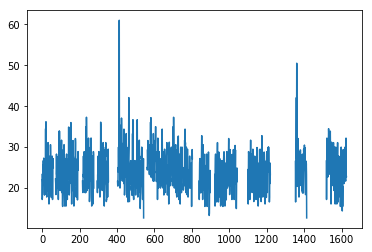

In [26]:
# divide by 10 because the units are tenths of celsius
(ghcn.apply(day_range, axis=1)/10).plot()

Grouping
=====

In [27]:
# group the data by station
by_station = ghcn.groupby("STATION_NAME")

In [28]:
# count the number of records for each station
by_station.count()

,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date
STATION_NAME,,,,,,,,,,,
BETHPAGE 0.9 NNW NY US,17,17,9,17,17,0,0,0,0,0,17
BRONX NY US,101,101,98,101,97,101,101,101,101,101,101
BROOKLYN 2.4 SW NY US,7,7,4,7,7,0,0,0,0,0,7
BROOKLYN 3.1 NW NY US,14,14,5,14,14,0,0,0,0,0,14
CENTERPORT NY US,121,121,120,121,120,121,121,121,121,121,121
CHESTNUT RIDGE 0.3 SSW NY US,9,9,3,9,9,0,0,0,0,0,9
DOBBS FERRY ARDSLEY NY US,83,83,75,83,75,83,83,83,83,83,83
FARMINGDALE REPUBLIC AIRPORT NY US,121,121,0,121,0,121,121,121,121,121,121
FLORAL PARK 0.4 W NY US,81,81,25,81,81,0,0,0,0,0,81


In [29]:
 #compute total snow and min temperature in each station
by_station.agg({'TSNW':np.sum,'EMNT':np.min})

,TSNW,EMNT
STATION_NAME,,
BETHPAGE 0.9 NNW NY US,253.0,NaN
BRONX NY US,6646.0,-144.0
BROOKLYN 2.4 SW NY US,476.0,NaN
BROOKLYN 3.1 NW NY US,714.0,NaN
CENTERPORT NY US,7441.0,-167.0
CHESTNUT RIDGE 0.3 SSW NY US,224.0,NaN
DOBBS FERRY ARDSLEY NY US,5835.0,-178.0
FARMINGDALE REPUBLIC AIRPORT NY US,0.0,-182.0
FLORAL PARK 0.4 W NY US,5608.0,NaN


In [30]:
# groupbys have many of the same methods as dataframe objects
# can compute summary statistics on the group
by_station['TSNW'].describe()

,count,mean,std,min,25%,50%,75%,max
STATION_NAME,,,,,,,,
BETHPAGE 0.9 NNW NY US,17.0,14.882353,33.631983,0.0,0.0,0.0,5.00,126.0
BRONX NY US,97.0,68.515464,164.535781,0.0,0.0,0.0,55.00,911.0
BROOKLYN 2.4 SW NY US,7.0,68.000000,104.850687,0.0,0.0,0.0,98.00,280.0
BROOKLYN 3.1 NW NY US,14.0,51.000000,128.667730,0.0,0.0,0.0,12.25,457.0
CENTERPORT NY US,120.0,62.008333,169.491702,0.0,0.0,0.0,20.00,1023.0
CHESTNUT RIDGE 0.3 SSW NY US,9.0,24.888889,55.582021,0.0,0.0,0.0,0.00,163.0
DOBBS FERRY ARDSLEY NY US,75.0,77.800000,181.301004,0.0,0.0,0.0,75.50,884.0
FARMINGDALE REPUBLIC AIRPORT NY US,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLORAL PARK 0.4 W NY US,81.0,69.234568,190.468257,0.0,0.0,0.0,0.00,963.0


In [31]:
#groups can be subgrouped further
groups = ['DATE', 'STATION_NAME']
# unstack turns the results into a table
ghcn.groupby(groups)['TSNW'].sum().unstack()

STATION_NAME,BETHPAGE 0.9 NNW NY US,BRONX NY US,BROOKLYN 2.4 SW NY US,BROOKLYN 3.1 NW NY US,CENTERPORT NY US,CHESTNUT RIDGE 0.3 SSW NY US,DOBBS FERRY ARDSLEY NY US,FARMINGDALE REPUBLIC AIRPORT NY US,FLORAL PARK 0.4 W NY US,HARRISON 4.1 SSW NY US,...,NEW YORK LAGUARDIA AIRPORT NY US,NEW YORK NY US,OCEANSIDE NY US,SPRING VALLEY 1.7 N NY US,STATEN ISLAND 1.4 SE NY US,STATEN ISLAND 4.5 SSE NY US,WANTAGH CEDAR CREEK NY US,WEST NYACK 1.3 WSW NY US,WESTCHESTER CO AIRPORT NY US,WHITE PLAINS 3.1 NNW NY US
DATE,,,,,,,,,,,,,,,,,,,,,
20050601,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20050701,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20050801,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20050901,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20051001,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20051101,NaN,0.0,NaN,NaN,20.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20051201,NaN,246.0,NaN,NaN,132.0,NaN,246.0,0.0,NaN,NaN,...,188.0,132.0,227.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20060101,NaN,18.0,NaN,NaN,64.0,NaN,58.0,0.0,NaN,NaN,...,74.0,41.0,84.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
20060201,NaN,519.0,NaN,NaN,340.0,NaN,356.0,0.0,NaN,NaN,...,645.0,417.0,339.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [32]:
# aggregate by custom function: 
# .map(lambda x)pulls out the months of the date column

months = ghcn['date'].map(lambda x: x.month)
ghcn.groupby(months).mean().head()

,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
date,,,,,,,,,,
1,2.010047e+07,292.074627,94.803922,725.514925,151.365217,145.131313,-120.474747,43.161616,-30.040404,6.606061
2,2.010043e+07,314.244275,213.850000,826.839695,307.750000,139.163265,-100.102041,48.928571,-28.959184,9.908163
3,2.010089e+07,404.686567,78.089888,1099.194030,44.754545,217.677083,-63.406250,103.562500,14.114583,58.854167
4,2.010095e+07,461.007812,0.000000,1013.625000,0.959596,285.626374,6.384615,165.582418,64.659341,115.230769
5,2.010207e+07,355.917910,0.000000,964.119403,0.000000,310.515789,54.273684,217.936842,118.547368,168.252632


# Merge

In [33]:
# use isin to filter for values in a list
stations = ['NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US',
            'NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US', 
            'NEW YORK LAGUARDIA AIRPORT NY US']
# store subset in nyc dataframe
nyc = ghcn[ghcn['STATION_NAME'].isin(stations)].copy()


In [34]:
# geographic locations of stations
coords = pd.read_csv('data/stations_list.csv')
coords

,datacoverage,elevation,elevationUnit,id,latitude,longitude,maxdate,mindate,name
0,0.9996,39.6,METERS,GHCND:USW00094728,40.7889,-73.9669,7/14/17,1869-01-01,"NY CITY CENTRAL PARK, NY US"
1,0.9999,3.4,METERS,GHCND:USW00014732,40.7792,-73.8800,7/16/17,10/7/39,"LA GUARDIA AIRPORT, NY US"
2,0.8741,3.4,METERS,GHCND:USW00094789,40.6386,-73.7622,7/16/17,7/17/48,"JFK INTERNATIONAL AIRPORT, NY US"


In [35]:
# build a mapping between the names of the stations in each file
name_map = dict(zip(stations,coords['name'].tolist()))
name_map

{'NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US': 'NY CITY CENTRAL PARK, NY US',
 'NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US': 'LA GUARDIA AIRPORT, NY US',
 'NEW YORK LAGUARDIA AIRPORT NY US': 'JFK INTERNATIONAL AIRPORT, NY US'}

In [36]:
# rename the stations so that they're the same across both files
nyc['STATION_NAME'].replace(name_map, inplace=True)

In [37]:
# merge the two csvs based on the station names (supports most sql merge types)
nycgeo = nyc.merge(coords[['name','latitude', 'longitude']], 
                   left_on = 'STATION_NAME', right_on='name')
# remove redundant columns
nycgeo.drop(columns=['name', 'DATE'],inplace=True)
nycgeo.head()

,STATION_NAME,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date,latitude,longitude
0,"LA GUARDIA AIRPORT, NY US",152.0,0.0,528.0,0.0,350.0,117.0,260.0,173.0,217.0,2005-06-01,40.7792,-73.88
1,"LA GUARDIA AIRPORT, NY US",439.0,0.0,1324.0,0.0,333.0,161.0,283.0,205.0,244.0,2005-07-01,40.7792,-73.88
2,"LA GUARDIA AIRPORT, NY US",104.0,0.0,148.0,0.0,356.0,178.0,300.0,215.0,257.0,2005-08-01,40.7792,-73.88
3,"LA GUARDIA AIRPORT, NY US",429.0,0.0,548.0,0.0,322.0,100.0,270.0,175.0,223.0,2005-09-01,40.7792,-73.88
4,"LA GUARDIA AIRPORT, NY US",1184.0,0.0,3803.0,0.0,244.0,33.0,177.0,108.0,142.0,2005-10-01,40.7792,-73.88


In [38]:
# use shapely to convert strings to geometric objects
import shapely.geometry as sgeo

nycgeo['geometry'] = nycgeo.apply(lambda row: 
                                  sgeo.Point(row['longitude'], row['latitude']), axis=1)

nycgeo.drop(columns=['latitude', 'longitude'], inplace=True)

nycgeo.head()

,STATION_NAME,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date,geometry
0,"LA GUARDIA AIRPORT, NY US",152.0,0.0,528.0,0.0,350.0,117.0,260.0,173.0,217.0,2005-06-01,POINT (-73.88 40.7792)
1,"LA GUARDIA AIRPORT, NY US",439.0,0.0,1324.0,0.0,333.0,161.0,283.0,205.0,244.0,2005-07-01,POINT (-73.88 40.7792)
2,"LA GUARDIA AIRPORT, NY US",104.0,0.0,148.0,0.0,356.0,178.0,300.0,215.0,257.0,2005-08-01,POINT (-73.88 40.7792)
3,"LA GUARDIA AIRPORT, NY US",429.0,0.0,548.0,0.0,322.0,100.0,270.0,175.0,223.0,2005-09-01,POINT (-73.88 40.7792)
4,"LA GUARDIA AIRPORT, NY US",1184.0,0.0,3803.0,0.0,244.0,33.0,177.0,108.0,142.0,2005-10-01,POINT (-73.88 40.7792)


# [GeoPandas](http://geopandas.org/)

In [39]:
import geopandas as gpd
gpd.__version__

'0.3.0'

In [40]:
# convert the pandas dataframe with geometric objects into a geopandas dataframe
crs = {'init': 'epsg:4326'}
ghcn_nyc = gpd.GeoDataFrame(nycgeo, crs=crs)

In [41]:
# load in a shape file to explain where the stations are geographically
coord_system = {'init': 'epsg:4326'}
tracts = gpd.GeoDataFrame.from_file("data/census_tracts/census2010.shp", crs=coord_system)

In [42]:
# the shapefile is loaded into a dataframe
tracts.head()

,ntacode,ctlabel,cdeligibil,shape_leng,ntaname,boro_name,boro_ct201,shape_area,boro_code,ct2010,puma,geometry
0,SI22,9,I,7729.016794,West New Brighton-New Brighton-St. George,Staten Island,5000900,2.497010e+06,5,000900,3903,POLYGON ((-74.07920577013245 40.64343078374567...
1,MN19,98,I,5534.199811,Turtle Bay-East Midtown,Manhattan,1009800,1.906016e+06,1,009800,3808,POLYGON ((-73.96432543478758 40.75638153099091...
2,MN19,100,I,5692.168737,Turtle Bay-East Midtown,Manhattan,1010000,1.860938e+06,1,010000,3808,POLYGON ((-73.96802436915851 40.75957814005282...
3,MN17,102,I,5687.802439,Midtown-Midtown South,Manhattan,1010200,1.860993e+06,1,010200,3807,POLYGON ((-73.97124277307127 40.76093641847906...
4,MN17,104,I,5693.036367,Midtown-Midtown South,Manhattan,1010400,1.864600e+06,1,010400,3807,POLYGON ((-73.97445730550224 40.76229308352487...


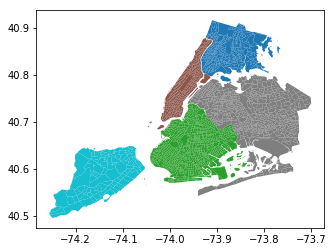

In [43]:
# plot the shapefile as a sanity check
# specifically plot the boro_name column
tracts.plot('boro_name')

In [44]:
import matplotlib
matplotlib.__version__

'2.1.1'

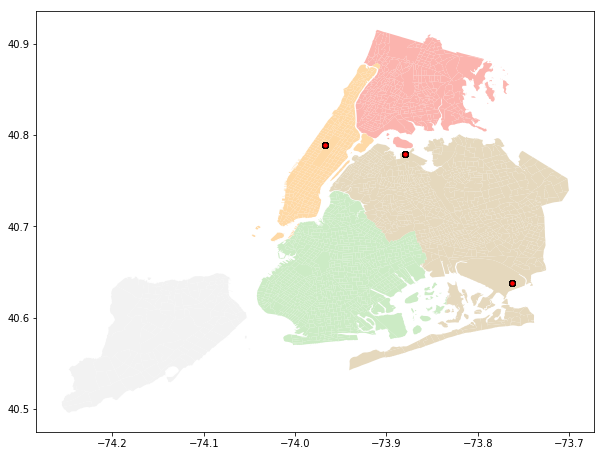

In [45]:
import matplotlib.pyplot as plt
# create a figure  
fig, ax = plt.subplots(figsize=(10,10))
# plot the locations of the stations
ghcn_nyc.plot(ax=ax, marker='o', color='red', edgecolor='black', markersize=30, zorder=10)
# plot takes many of the matplotlib keywords
tracts.plot('boro_name', ax=ax, cmap='Pastel1')
ax.set_aspect("equal")

In [46]:
#compute distance from station to each tract
distances = tracts.apply(lambda row: 
                         ghcn_nyc['geometry'].distance(row['geometry'].centroid), axis=1)

In [47]:
# Find the station closest to each tract
# .values returns the array/matrix of values
stationID = np.argmin(distances.values,axis=1)
# create a new column in station that contains the name of the closest station
tracts['station'] = nycgeo.iloc[stationID]['STATION_NAME'].values

In [48]:
# create a column of min distances 
tracts['distances'] = distances.min(axis=1)

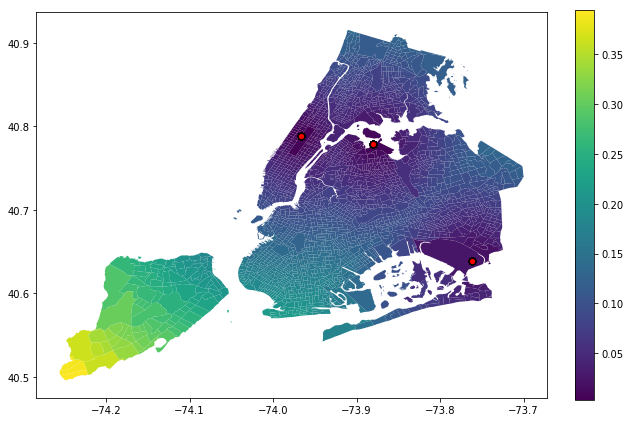

In [49]:
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
norm = mcolors.Normalize(vmin=0, vmax=.4)
cmap = 'viridis'

fig, ax = plt.subplots(figsize=(10,10))

ghcn_nyc.plot(ax=ax, marker='o', color='red', edgecolor='black', markersize=40, zorder=10)
tracts.plot('distances', ax=ax, cmap=cmap, norm=norm)

ax.set_aspect("equal")
# Create a colorbar - because polygons are being plotted, 
# create a fake "image" on which to lay the colorbar
# must use same cmap/norm as in the plot
sm = mcm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
fig.colorbar(sm, ax=ax, fraction=.035)


In [50]:
# geographical aggregation - in this case aggregate up using the 'boro_name' column
boros = tracts.dissolve(by='boro_name', aggfunc='max')

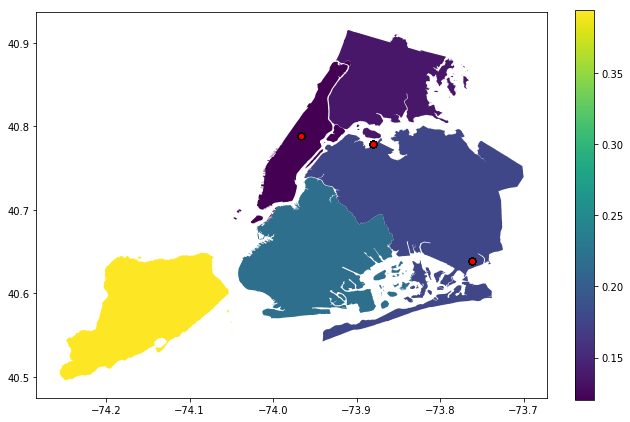

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

ghcn_nyc.plot(ax=ax, marker='o', color='red', edgecolor='black', markersize=40, zorder=10)
boros.plot('distances', ax=ax, cmap=cmap, norm=norm)

ax.set_aspect("equal")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
fig.colorbar(sm, ax=ax, fraction=.035)

In [52]:
# use a spatial join to find all the tracts that contain stations
tracts_with_stations = gpd.sjoin(tracts, ghcn_nyc, how="inner", op='contains')

In [53]:
tracts_with_stations.reset_index(inplace=True)

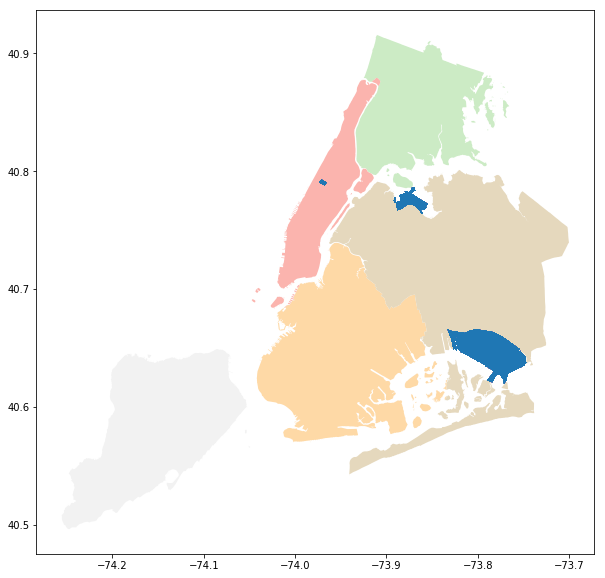

In [54]:
fig, ax = plt.subplots(figsize=(10,10))

boros.plot('boro_code', ax=ax, cmap='Pastel1')
tracts_with_stations.plot(ax=ax)


# Acknowledgements
* Software Carpentary tutorial: https://github.com/story645/ccny_software_carpentary/blob/master/afternoon_session.ipynb

GeoPandas suggestions:
* Paul Hobson (Geosyntec Consultants)
* Tahir Butt (The Graduate Center (CUNY)/Digital Fellows (Graduate Center Digital Initiatives)